In [1]:
%reload_ext autoreload
%autoreload 2
from graphe import *
from model_checking import *

In [ ]:
g = graphe("exemples/6faces.mdp")
gr = graphe("exemples/manchot2bras.mdp")
gr2 = graphe("exemples/exreward.mdp")
gprof1 = graphe("exemples_prof/fichier1-ex.mdp")
gprof2 = graphe("exemples_prof/fichier2-mc.mdp")
gprof3 = graphe("exemples_prof/fichier3-mdp.mdp")
gprof4 = graphe("exemples_prof/fichier4-prob.mdp")
gex = graphe("exemples/ex.mdp")
gex2 = graphe("exemples/ex2.mdp")

# Algorithmes de Model-checking

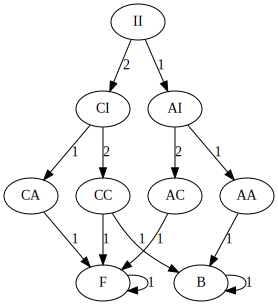

In [44]:
gprof2.visualizeGraphe() # Chaîne utilisée pour l'exemple

## Model-checking probabiliste

Calcule les probabilités d'atteindre certains états $S_1$ à partir de tous les états $S_0$

Chaîne de Markov : Pour calculer le pctl par résolution de $A . x = b$ :

In [43]:
pctl_finally(gprof2,["F"])

,II,CI,AI,CC
P,0.666667,0.666667,0.666667,0.5


In [9]:
pctl_finally_max_bound(g,["T1","T2"], 50)

,I,S1,S3,S4
P,0.333333,0.666667,0.833333,0.5


MDP : Pour calculer le pctl par résolution de $A.x \leq b$

In [31]:
pctl_mdp(gprof3, ["S1"])

,S0,S2
P,0.5,0.5


## Model-checking statistique
### SMC Quantitatif

In [39]:
montecarlo_SMC(gprof2) 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.66037736, 0.3427673 ])

### SMC qualitatif

In [67]:
def prop1(s):
    return (s=="F")

def prop2(s):
    return (s=="B")

In [68]:
sprt_SMC(gprof2, prop1)
sprt_SMC(gprof2, prop2)

i = 451 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : -4.600613480575412
H0 : gamma >= 0.5 accepté
i = 443 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : 4.600613480575412
H1 : gamma < 0.5 accepté


False

### SMC pour les MDP :

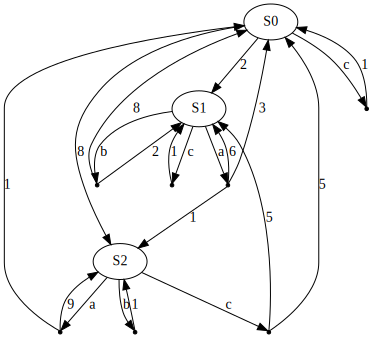

In [152]:
gex.visualizeGraphe()

In [169]:
def phi(s):
    return (s=="S2")

In [170]:
smc_mdp(gex, 0.5, 0.5 , 15, 15, 0.5, 0.5, phi, 0.5)

i = 153 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : -4.600613480575412
H0 : gamma >= 0.5 accepté


True

## Méthode à itérations : 

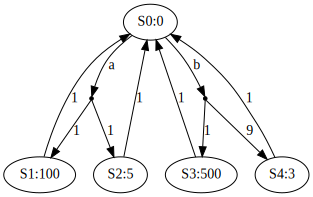

In [151]:
gr.visualizeGraphe()

In [150]:
iter_valeurs(gr, gamma = 0.5)

([35.124755859375,
  117.54951171875,
  22.54951171875,
  517.54951171875,
  20.54951171875],
 [1, 0, 0, 0, 0])

In [100]:
iter_politique(gr, gamma = 0.5)

(array([ 35.13333333, 117.56666667,  22.56666667, 517.56666667,
         20.56666667]),
 [1, 0, 0, 0, 0])

## Algorithmes d'apprentissage par renforcerment

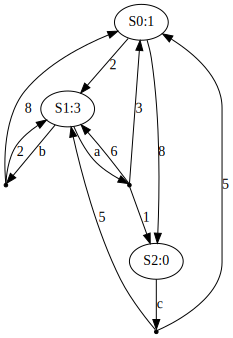

In [102]:
gr2.visualizeGraphe()

Méthode de Monte-Carlo : 

In [132]:
montecarlo_rl(gr2, [0,0,2], N = 150)

array([1.88  , 2.7384, 0.4824])

Différence temporelle :

In [144]:
td_rl(gr2, [0,1,2], N = 150)

array([11.33178968, 13.28633473, 11.24230291])

SARSA : 

In [145]:
sarsa_rl(gr2)

[[2.2413553  2.01919687 1.93626481]
 [3.33659688 2.45412766 0.        ]
 [0.         0.         3.14268126]]


array([0, 0, 2], dtype=int64)

Q-Learning :

In [171]:
qlearning_rl(gr)

[[ 40.17169564  42.75492549]
 [123.13407345 123.9428261 ]
 [ 28.1116598   28.10160228]
 [522.44663573 524.60353219]
 [ 25.7906992   25.33429928]]


array([1, 1, 0, 1, 0], dtype=int64)

In [172]:
qlearning_rl(gr2)

[[2.05981418 2.14365678 2.24952743]
 [4.80747445 4.32968895 0.        ]
 [0.         0.         1.73106232]]


array([2, 0, 2], dtype=int64)